In [1]:
#Import libraries
import random
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Setting the variables for my initial data
mean = .5
std = mean/6
datapoints = 20000

In [3]:
#Function to get a list with a gaussian distribution
def get_gaussian_dist(mean,std,datapoints):
    gauss_lst = []
    while len(gauss_lst) < datapoints:
        sample = random.gauss(mean, std)
        if sample >= 0 and sample <= 1:
            gauss_lst.append(sample)
    return gauss_lst    

#Function to calculate the multiplier for water based on 3 regions
def get_waterfall(datapoints):
    pop = [-.02,0,.02]
    wei = [3,3,3]    
    lst = []
    for points in range(datapoints):
        multi = random.choices(pop,wei,k=1)
        lst.append(multi[0])
    return(lst)

In [4]:
def make_dataframe(mean,std,datapoints,plant,base,multi):
    gauss_1 = get_gaussian_dist(mean,std,datapoints)
    gauss_2 = get_gaussian_dist(mean,std,datapoints)
    gauss_3 = get_gaussian_dist(mean,std,datapoints)
    gauss_4 = get_gaussian_dist(mean,std,datapoints)
    water_1 = get_waterfall(datapoints)
    water_2 = get_waterfall(datapoints)
    dict = {'Base_gauss_1':gauss_1,'Sun_gauss_1':gauss_2,'Base_gauss_2':gauss_3,'Sun_gauss_2':gauss_4,
            'Water_multi_1':water_1,'Water_multi_2':water_2}
    df=pd.DataFrame(dict)
    df['var_1'] = (((df['Base_gauss_1'] * multi) + base) + df['Sun_gauss_1']) * (df['Water_multi_1'] + 1)
    df['var_2'] = (((df['Base_gauss_2'] * multi) + base) + df['Sun_gauss_2']) * (df['Water_multi_2'] + 1)
    df['plant_type'] = plant
    return(df)

In [5]:
plant_1 = make_dataframe(mean,std,datapoints,'plant_1',9.9,1)
plant_2 = make_dataframe(mean,std,datapoints,'plant_2',10.1,1)
plant_3 = make_dataframe(mean,std,datapoints,'plant_3',9.8,1.4)

In [6]:
fake_iris = pd.concat([plant_1,plant_2,plant_3])

In [7]:
fake_iris.sample(10)

,Base_gauss_1,Sun_gauss_1,Base_gauss_2,Sun_gauss_2,Water_multi_1,Water_multi_2,var_1,var_2,plant_type
15936,0.395124,0.484125,0.604513,0.550948,0.02,0.00,11.198834,11.255461,plant_2
18607,0.604550,0.612786,0.585795,0.305896,0.02,0.00,11.339682,10.791691,plant_1
17373,0.424946,0.615534,0.421440,0.367521,0.02,-0.02,11.159290,10.475182,plant_1
15389,0.582242,0.530683,0.514076,0.519660,0.00,0.00,11.212925,11.133735,plant_2
19127,0.560389,0.582714,0.482259,0.461741,-0.02,0.00,11.018241,11.044000,plant_2
17935,0.345111,0.512624,0.427216,0.503947,0.02,0.00,11.176890,11.031163,plant_2
537,0.472772,0.364713,0.727126,0.712170,-0.02,0.00,10.718735,11.539295,plant_2
1729,0.314419,0.416602,0.429011,0.473309,0.00,0.00,10.831021,11.002320,plant_2
14005,0.394987,0.503552,0.526564,0.465583,0.02,0.02,11.073665,11.222828,plant_3
17898,0.477388,0.461221,0.542962,0.526038,0.00,0.00,10.838609,10.969000,plant_1


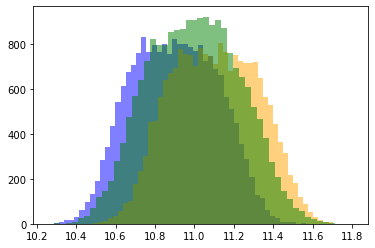

In [8]:
plt.hist(plant_1['var_1'], bins = 50, color='blue',alpha=.5);
plt.hist(plant_2['var_1'], bins = 50, color='orange',alpha=.5);
plt.hist(plant_3['var_1'], bins = 50, color='green',alpha=.5);

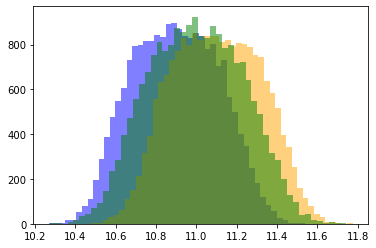

In [9]:
plt.hist(plant_1['var_2'], bins = 50, color='blue',alpha=.5);
plt.hist(plant_2['var_2'], bins = 50, color='orange',alpha=.5);
plt.hist(plant_3['var_2'], bins = 50, color='green',alpha=.5);

In [10]:
fake_iris.sample(5)

,Base_gauss_1,Sun_gauss_1,Base_gauss_2,Sun_gauss_2,Water_multi_1,Water_multi_2,var_1,var_2,plant_type
10575,0.369327,0.528410,0.384426,0.441124,0.00,0.00,10.845468,10.779320,plant_3
12891,0.547999,0.441020,0.475791,0.471009,0.00,0.02,10.889019,11.063737,plant_1
14539,0.641536,0.645518,0.368575,0.579801,0.00,-0.02,11.387054,10.827408,plant_2
7930,0.498434,0.528499,0.437226,0.648530,0.00,0.00,11.026306,11.060647,plant_3
12923,0.441506,0.382432,0.545826,0.637818,0.02,0.02,11.016551,11.426014,plant_3


In [15]:
test_df = fake_iris[['var_1','var_2','plant_type']].copy()

In [16]:
test_df.sample(5)

,var_1,var_2,plant_type
9474,10.583706,10.903356,plant_1
12993,11.083627,11.011201,plant_2
13676,10.849023,10.894505,plant_1
4782,10.881528,11.482289,plant_2
3919,11.074500,11.205095,plant_3


In [17]:
X = test_df.iloc[:,:-1].values
y = test_df.iloc[:,-1].values

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [19]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, criterion = 'entropy', random_state = 0)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[2705  980 1325]
 [1089 2554 1353]
 [1850 1673 1471]]


0.44866666666666666

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
from sklearn.linear_model import LogisticRegression
log_cla = LogisticRegression(random_state = 0)
log_cla.fit(X_train, y_train)
log_pred = log_cla.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, log_pred)
print(cm)
accuracy_score(y_test, log_pred)

[[3174  780 1056]
 [ 855 3105 1036]
 [1886 1930 1178]]


0.4971333333333333